## (a) Here 'K' (Minimum number of steps needed to reach the destination) takes integer values and it looks like staircase function.
##We know that the sublevel sets of staircase function is convex but the function itself is not convex. So this problem is quasi-convex problem.

##(b) Formulation of optimization problem(Minimum time maneuver for a crane) 

In [49]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

#Data given:
max_T = 2.0 #Maximum Tension 
h = 0.1 #step size
m = 0.1 #Load mass
theta = 15*(np.pi)/180
Fi = np.array([[-np.sin(theta),np.sin(theta)],[np.cos(theta),np.cos(theta)]]) #total force on load
g = np.transpose(np.matrix([0,-9.8]))
p_val = 0
T_val = 0
p_init = np.array([0,0]) #Intial position
p_des = np.array([10,2]) #Destination


'Bisection Method:'
lower_bound = 0
upper_bound = 100
while not lower_bound + 1 == upper_bound:
  k = int((lower_bound+upper_bound)/2)

  ##Variables
  v = cp.Variable((2,k)) #velocity
  p = cp.Variable((2,k)) #position
  T = cp.Variable((2,k-1)) #Tension

  F = Fi@T+m*np.tile(g,(1,k-1))
  
  ##constraints
  constraints = [v[:,1:k]==v[:,0:k-1]+(h/m)*F,p[:,1:k]==p[:,0:k-1]+h*v[:,0:k-1]]
  constraints = constraints + [0<=T, T<=max_T,p[:,0]==p_init,p[:,k-1]==p_des,v[:,0]==0,v[:,k-1]==0]

  ##Objective
  objective = cp.Minimize(0) #Quasi-convex optimization problem

  ##Solving the problem
  problem = cp.Problem(objective,constraints) 
  optimum_val = problem.solve()
  if optimum_val==0:
    upper_bound = k
    p_val = p.value
    T_val = T.value
  else:
    lower_bound = k
k = upper_bound;

##printing the result
print('Minimum number of steps needed to reach the destination(k): '+str(k))

Minimum number of steps needed to reach the destination(k): 34


##Plot for Load  trajectory

Text(0, 0.5, 'Change in position of the load')

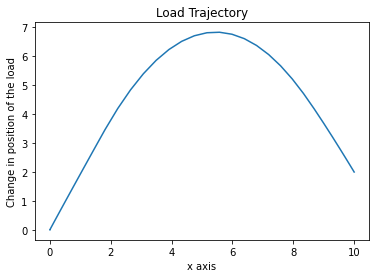

In [50]:
plt.plot(p_val[0,:].T,p_val[1,:].T)
plt.title('Load Trajectory')
plt.xlabel('x axis')
plt.ylabel('Change in position of the load')

##Plot for Tensions Vs Time 

Text(0, 0.5, 'Tensions')

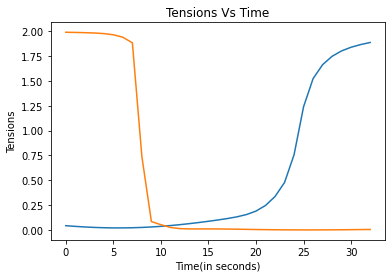

In [51]:
plt.plot(T_val.T)
plt.title('Tensions Vs Time')
plt.xlabel('Time(in seconds)')
plt.ylabel('Tensions')